In [1]:
#!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

2023-03-22 14:40:53.685556: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
train_dir = "/Users/rafiansari/Desktop/Data Analyst Projects/ML Model Building and Deep Learning/GroceryStoreDataset/dataset/train"
test_dir = "/Users/rafiansari/Desktop/Data Analyst Projects/ML Model Building and Deep Learning/GroceryStoreDataset/dataset/test"
valid_dir = "/Users/rafiansari/Desktop/Data Analyst Projects/ML Model Building and Deep Learning/GroceryStoreDataset/dataset/val"

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='categorical')
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_generator, 
    (tf.float32, tf.float32), 
    (
        tf.TensorShape([None, 150, 150, 3]),
        tf.TensorShape([None, 3])
    )
)

train_dataset = train_dataset.repeat()

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=32, class_mode='categorical')
test_dataset = tf.data.Dataset.from_generator(
    lambda: test_generator, 
    (tf.float32, tf.float32), 
    (
        tf.TensorShape([None, 150, 150, 3]),
        tf.TensorShape([None, 3])
    )
)

test_dataset = test_dataset.repeat()

valid_generator = valid_datagen.flow_from_directory(valid_dir, target_size=(150, 150), batch_size=32, class_mode='categorical')
valid_dataset = tf.data.Dataset.from_generator(
    lambda: valid_generator, 
    (tf.float32, tf.float32), 
    (
        tf.TensorShape([None, 150, 150, 3]),
        tf.TensorShape([None, 3])
    )
)

valid_dataset = valid_dataset.repeat()

Found 2640 images belonging to 3 classes.
Found 2485 images belonging to 3 classes.
Found 296 images belonging to 3 classes.


2023-03-22 14:41:01.985753: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))


In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [8]:
history = model.fit(train_dataset, steps_per_epoch=50, epochs=10, validation_data=valid_dataset, validation_steps=50)
print(history.history.keys())

Epoch 1/10
50/50 [==============================] - 49s 957ms/step - loss: 0.8105 - accuracy: 0.6363 - val_loss: 1.0648 - val_accuracy: 0.5709
Epoch 2/10
50/50 [==============================] - 46s 923ms/step - loss: 0.6558 - accuracy: 0.7134 - val_loss: 0.8814 - val_accuracy: 0.6257
Epoch 3/10
50/50 [==============================] - 49s 980ms/step - loss: 0.5651 - accuracy: 0.7456 - val_loss: 0.7434 - val_accuracy: 0.6655
Epoch 4/10
50/50 [==============================] - 56s 1s/step - loss: 0.5326 - accuracy: 0.7532 - val_loss: 0.6814 - val_accuracy: 0.6919
Epoch 5/10
50/50 [==============================] - 57s 1s/step - loss: 0.4381 - accuracy: 0.7891 - val_loss: 0.7112 - val_accuracy: 0.7250
Epoch 6/10
50/50 [==============================] - 48s 947ms/step - loss: 0.4017 - accuracy: 0.8338 - val_loss: 0.6583 - val_accuracy: 0.7365
Epoch 7/10
50/50 [==============================] - 46s 928ms/step - loss: 0.3814 - accuracy: 0.8340 - val_loss: 0.6428 - val_accuracy: 0.7466
Epoch

In [9]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
print(val_acc)

[0.5709459185600281, 0.6256756782531738, 0.6655405163764954, 0.6918919086456299, 0.7250000238418579, 0.7364864945411682, 0.7466216087341309, 0.7013513445854187, 0.7020270228385925, 0.7270269989967346]


In [10]:
score = model.evaluate(test_generator, steps=50)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

50/50 [==============================] - 14s 282ms/step - loss: 0.4531 - accuracy: 0.8075
Test loss: 0.45309311151504517
Test accuracy: 0.8075000047683716


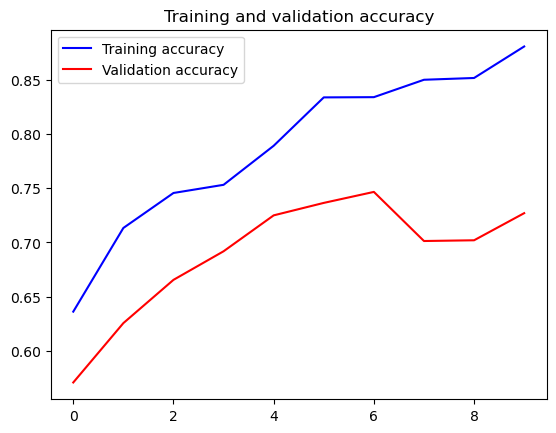

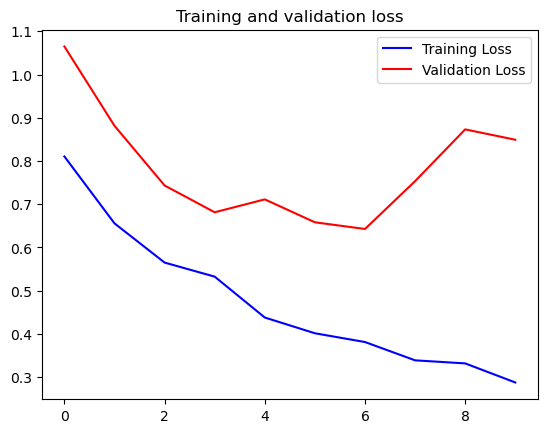

In [11]:
import matplotlib.pyplot as plt
import numpy as np

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [12]:
model.save('grocery_store_model.h5')